## References:
- https://docling-project.github.io/docling/
- https://github.com/tesseract-ocr/tessdata
- https://github.com/tesseract-ocr/tesseract

In [ ]:
import base64
import re
import textwrap
from io import BytesIO
from pathlib import Path
import os

import numpy as np
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import (
    PdfPipelineOptions,
    
    # OCR Models
    EasyOcrOptions,
    RapidOcrOptions,
    TesseractCliOcrOptions,
    
    # VLM Models
    smolvlm_picture_description,
    granite_picture_description,
)
from docling.document_converter import DocumentConverter, PdfFormatOption
from IPython.display import HTML, display
from ollama import chat
from PIL import Image

In [ ]:
pipeline_options = PdfPipelineOptions(
    # To create images of each page for visual inspection later.
    generate_page_images=True,

    # Keep images at their original resolution during processing.
    images_scale=1.00,

    # To perform Optical Character Recognition (specified in ocr_options),
    # ensuring text is extracted even from
    # image-based PDFs or scanned sections.
    do_ocr=True,
    # ocr_options=EasyOcrOptions(lang=["en", "hi"]),
    # ocr_options=EasyOcrOptions(lang=["hi"], force_full_page_ocr=True),
    ocr_options=TesseractCliOcrOptions(lang=["hin"], force_full_page_ocr=True),

    # To use a Vision Language Model (VLM)
    do_picture_description=True,
    picture_description_options=smolvlm_picture_description,
    # picture_description_options=granite_picture_description,
    
    # Enrichments
    do_formula_enrichment=True, # perform formula OCR, return Latex code
    do_table_structure=True,
    do_code_enrichment=False,
    do_picture_classification=True,
)

pipeline_options

PdfPipelineOptions(document_timeout=None, accelerator_options=AcceleratorOptions(num_threads=4, device='auto', cuda_use_flash_attention2=False), enable_remote_services=False, allow_external_plugins=False, artifacts_path=None, do_picture_classification=True, do_picture_description=True, picture_description_options=PictureDescriptionVlmOptions(batch_size=8, scale=2, picture_area_threshold=0.05, repo_id='HuggingFaceTB/SmolVLM-256M-Instruct', prompt='Describe this image in a few sentences.', generation_config={'max_new_tokens': 200, 'do_sample': False}), images_scale=2.0, generate_page_images=True, generate_picture_images=False, do_table_structure=True, do_ocr=True, do_code_enrichment=False, do_formula_enrichment=True, force_backend_text=False, table_structure_options=TableStructureOptions(do_cell_matching=True, mode=<TableFormerMode.ACCURATE: 'accurate'>), ocr_options=TesseractCliOcrOptions(lang=['hin'], force_full_page_ocr=True, bitmap_area_threshold=0.05, tesseract_cmd='tesseract', path

In [55]:
converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)
converter

In [56]:
!tree data/hindi/

data/hindi/
├── jhkr101.pdf
├── jhkr102.pdf
├── jhkr103.pdf
├── jhkr1dd.zip
├── jhkr1lp.pdf
└── jhkr1ps.pdf

1 directory, 6 files


Python(54269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [57]:
document_path = Path("./data/hindi/jhkr101.pdf")
result = converter.convert(document_path)
document = result.document

2025-09-28 14:59:21,833 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-09-28 14:59:21,845 - INFO - Going to convert document batch...
2025-09-28 14:59:21,846 - INFO - Initializing pipeline for StandardPdfPipeline with options hash c8f44c02073cb4a537083c1b0bc6de53
2025-09-28 14:59:22,374 - INFO - Accelerator device: 'mps'
2025-09-28 14:59:39,671 - INFO - Accelerator device: 'mps'
Python(54410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
2025-09-28 14:59:44,041 - INFO - command: tesseract --list-langs
Python(54425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizer

RuntimeError: MPS backend out of memory (MPS allocated: 8.30 GiB, other allocations: 419.59 MiB, max allowed: 9.07 GiB). Tried to allocate 408.00 MiB on private pool. Use PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0 to disable upper limit for memory allocations (may cause system failure).

{'schema_name': 'DoclingDocument',
 'version': '1.7.0',
 'name': 'jhkr101',
 'origin': {'mimetype': 'application/pdf',
  'binary_hash': 2433361576009571979,
  'filename': 'jhkr101.pdf'},
 'furniture': {'self_ref': '#/furniture',
  'children': [],
  'content_layer': 'furniture',
  'name': '_root_',
  'label': 'unspecified'},
 'body': {'self_ref': '#/body',
  'children': [{'$ref': '#/pictures/0'},
   {'$ref': '#/texts/1'},
   {'$ref': '#/pictures/1'},
   {'$ref': '#/pictures/2'},
   {'$ref': '#/texts/4'},
   {'$ref': '#/texts/5'},
   {'$ref': '#/texts/6'},
   {'$ref': '#/texts/7'},
   {'$ref': '#/texts/8'},
   {'$ref': '#/pictures/3'},
   {'$ref': '#/texts/12'},
   {'$ref': '#/pictures/4'},
   {'$ref': '#/pictures/5'},
   {'$ref': '#/texts/14'},
   {'$ref': '#/texts/15'},
   {'$ref': '#/pictures/6'},
   {'$ref': '#/texts/16'},
   {'$ref': '#/texts/17'},
   {'$ref': '#/texts/18'},
   {'$ref': '#/texts/19'},
   {'$ref': '#/texts/20'},
   {'$ref': '#/texts/21'},
   {'$ref': '#/texts/22'},
 
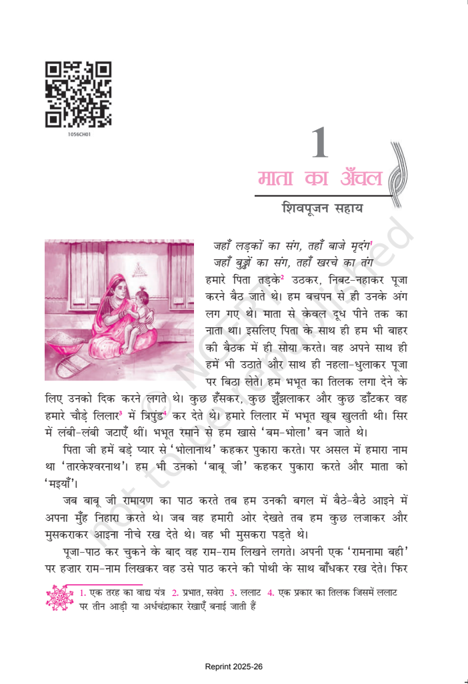
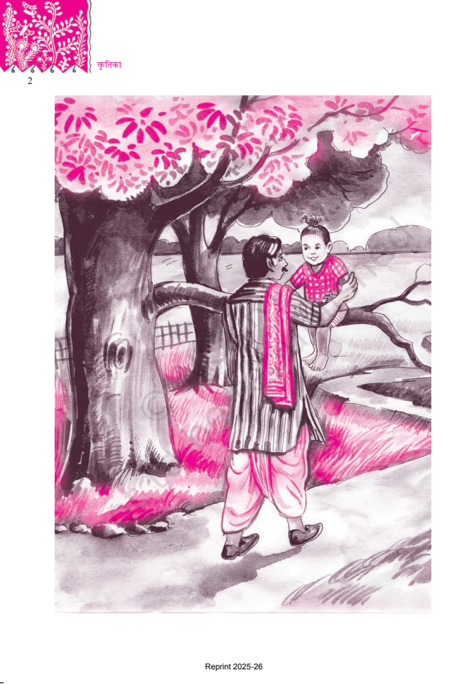
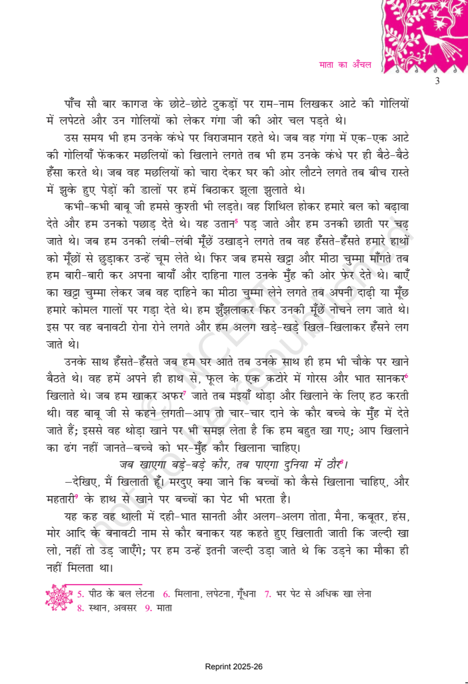
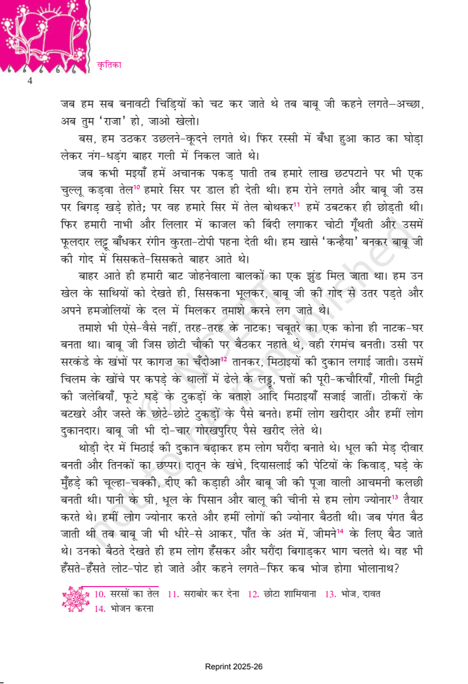
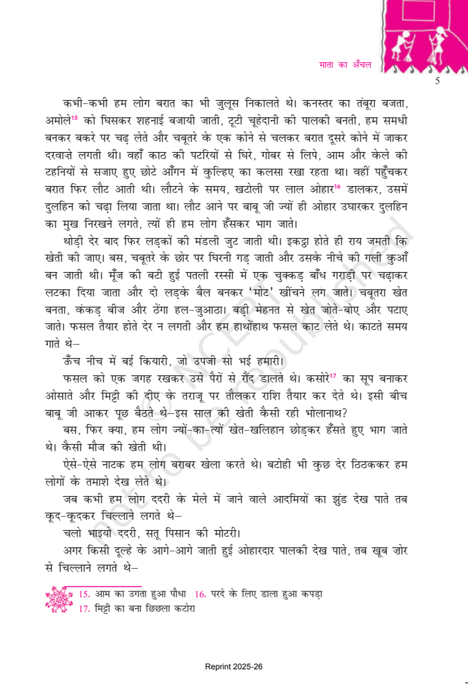
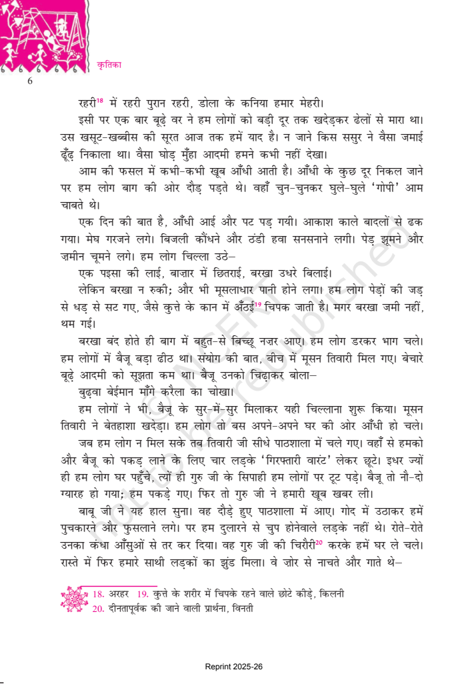
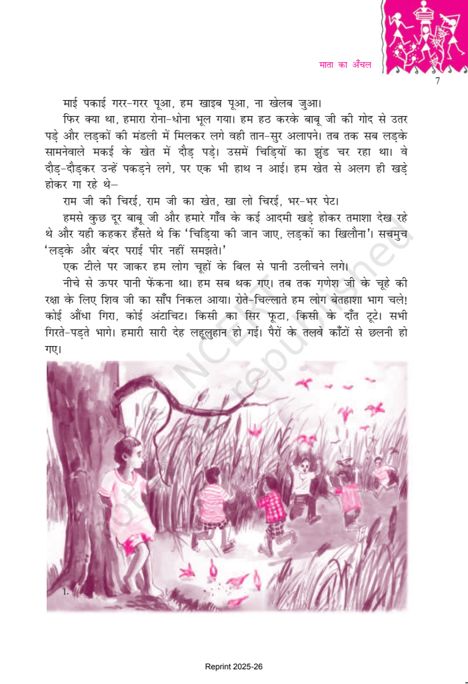
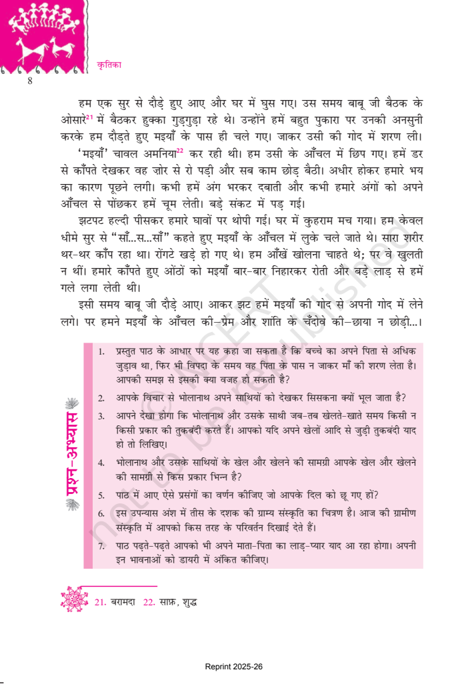
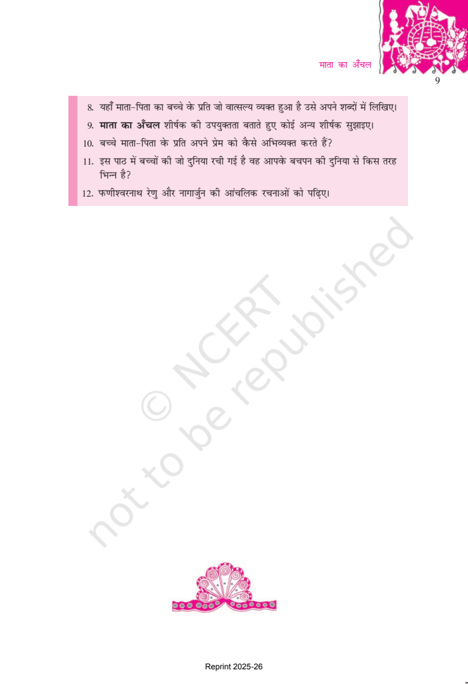

In [ ]:
print(document.export_to_markdown())